<a href="https://colab.research.google.com/github/Hinal-Srivastava/globalTerrorism/blob/main/globalTerrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Global Terrorism**
### Presented By : Hinal Srivastava
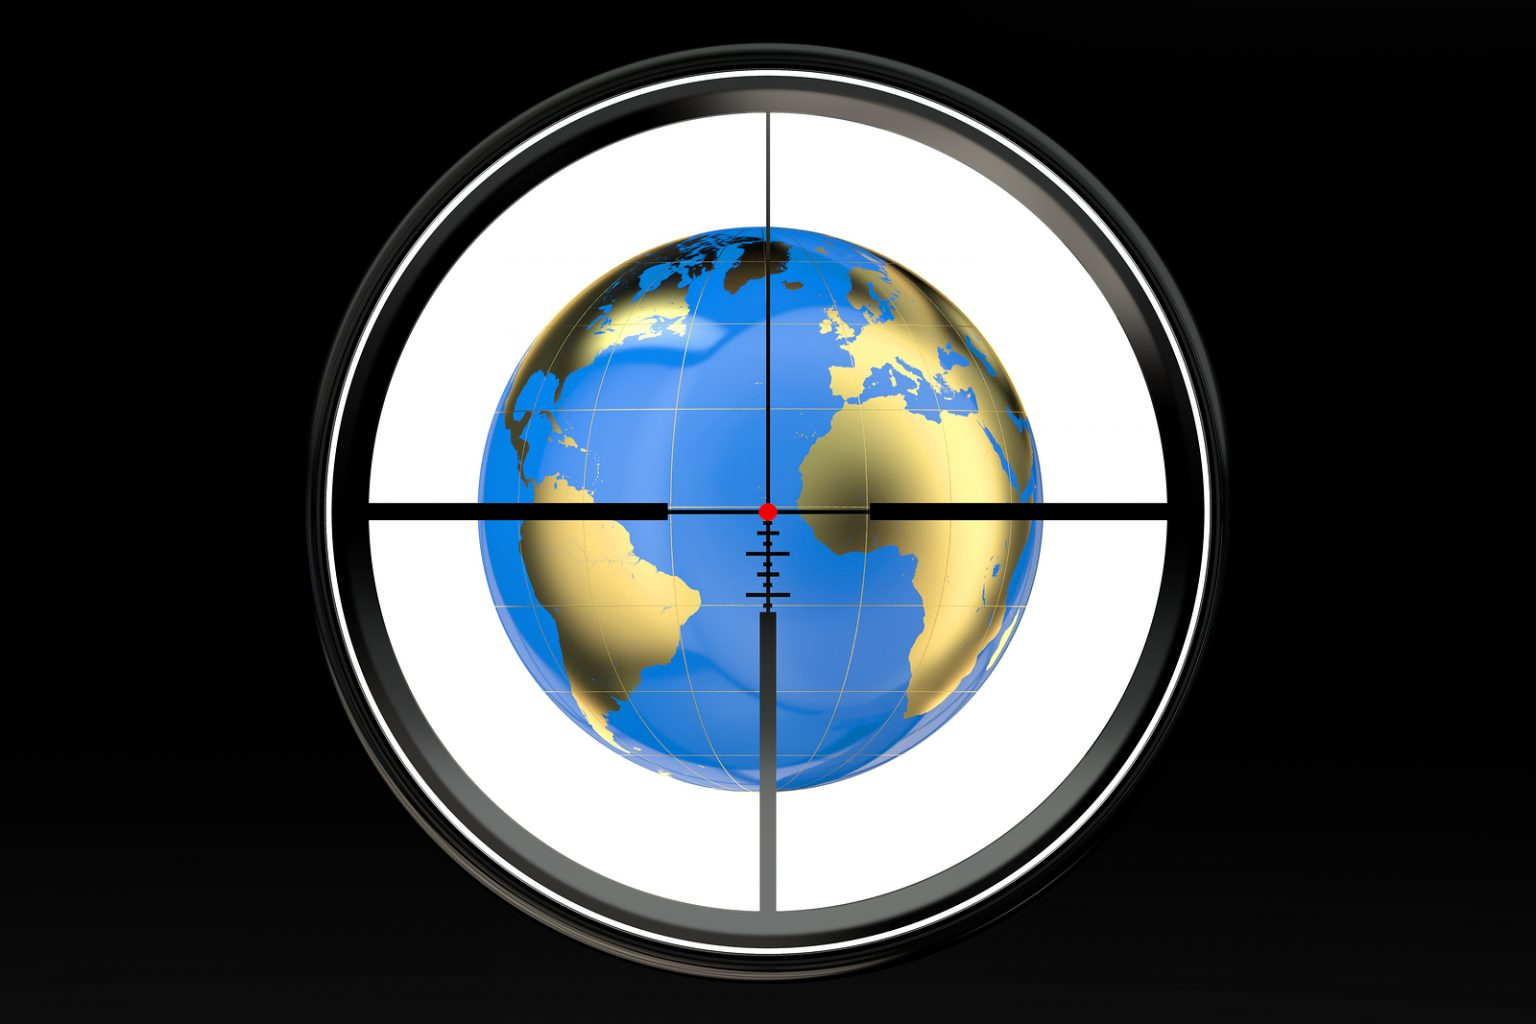

## Import Necessary Libraries

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import signal

## Reading the Data and Analyzing 

In [ ]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin', low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(22), object(56)
memory usage: 19.4+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.887000e+04,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18123.000000,1.812300e+04,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,2866.000000,18870.000000,18870.000000,18870.000000,18870.000000,27.000000,2.000000,18870.000000,17809.000000,18815.000000,246.000000,179.000000,218.000000,33.000000,22.000000,33.000000,0.0,0.0,18870.000000,38.000000,2.000000,18870.000000,3731.000000,956.000000,960.000000,250.000000,11.000000,10.000000,1.0,1.0,20.000000,18870.000000,15288.000000,1214.00000,1022.000000,177.000000,153.000000,34.000000,32.00000,15348.000000,1462.000000,1547.000000,13827.000000,1428.000000,1390.000000,18870.000000,8857.000000,4.245000e+03,18701.000000,1625.000000,1625.000000,462.000000,316.000000,18594.000000,4.330000e+02,1.0,9.000000e+01,1.0,670.000000,510.000000,18869.000000,18869.000000,18869.000000,18869.000000
mean,1.978580e+11,1978.517011,6.198781,15.206465,0.019131,177.541176,5.416428,26.370738,-4.786345e+03,1.289401,0.015951,0.989507,0.990991,0.874775,-1.488076,1.226448,0.038580,0.909963,0.000159,3.151298,4.962963,3.000000,7.007419,41.403841,138.008238,9.475610,50.709497,171.224771,8.939394,57.181818,138.151515,NaN,NaN,0.041918,0.342105,0.500000,0.002226,-6.153578,-80.075314,-0.098958,4.516000,0.909091,3.300000,1.0,1.0,0.450000,6.622523,10.485217,6.39374,9.517613,6.299435,7.091503,6.147059,10.46875,1.672335,0.181259,0.398190,1.423158,0.351541,0.064748,0.638209,3.476798,3.315966e+05,0.086894,-15.302769,0.146462,6.424242,24.889241,0.023448,3.788639e+06,20000.0,1.333696e+06,0.0,2.902985,8.225490,-3.631989,-3.589485,0.249987,-2.612963
std,3.406406e+08,3.409654,3.448318,8.955007,0.136989,166.162416,3.357730,22.515713,6.402079e+05,0.952265,0.125290,0.101898,0.094490,0.330983,3.563100,0.524458,0.192596,0.286242,0.012608,1.988080,2.441334,1.414214,6.288196,30.803331,77.891122,6.736242,27.938425,99.959392,6.072167,25.531747,71.290831,NaN,NaN,0.200408,0.480783,0.707107,0.047127,73.539927,39.465865,1.859395,3.081514,0.301511,3.560587,NaN,NaN,0.510418,2.414232,7.153544,1.93501,6.962273,2.237503,6.704633,1.282336,7.50047,7.496595,1.086589,2.556315,10.227504,2.294921,0.362152,0.803665,0.527205,8.718273e+06,0.281687,125.510934,4.552995,81.303740,64.893591,0.151327,4.845468e+07,NaN,4.800603e+06,NaN,1.298898,28.655294,4.529369,4.575088,0.645339,4.518743
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,8.000000,15.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000,1.000000,2.00000,2.000000,5.000000,2.000000,5.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.977042e+11,1977.000000,3.000000,8.000000,0.000000,69.000000,2.000000,13.692880,-8.688120e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.

In [ ]:
df.shape

(18870, 135)

In [ ]:
df['casualities'] = df['nkill'] + df['nwound']

In [ ]:
df.shape

(18870, 136)

In [ ]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Maximum people killed in an attack:',df['nkill'].max())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Year with the least attacks:",df['iyear'].value_counts().idxmin())
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())
print("Most Active Group:",df['gname'].value_counts().index[1])

Country with Highest Terrorist Attacks: El Salvador
Maximum people killed in an attack: 422.0
Year with the most attacks: 1980
Year with the least attacks: 1986
Most Attack Types: Bombing/Explosion
Most Active Group: Irish Republican Army (IRA)


## Static Visualizations


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



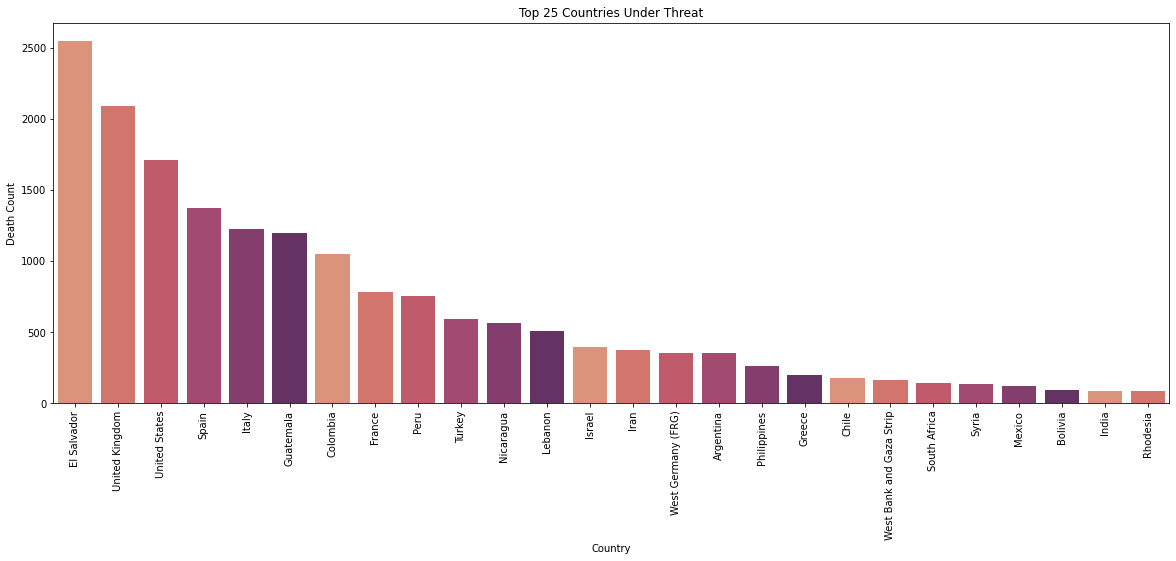

In [ ]:
plt.figure(figsize = (20,7))
p = df['country_txt'].value_counts().index
sns.countplot(df['country_txt'], 
              order = p[:26],
              palette = sns.color_palette("flare"))
plt.xlabel('Country')
plt.ylabel('Death Count')
plt.title('Top 25 Countries Under Threat')
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



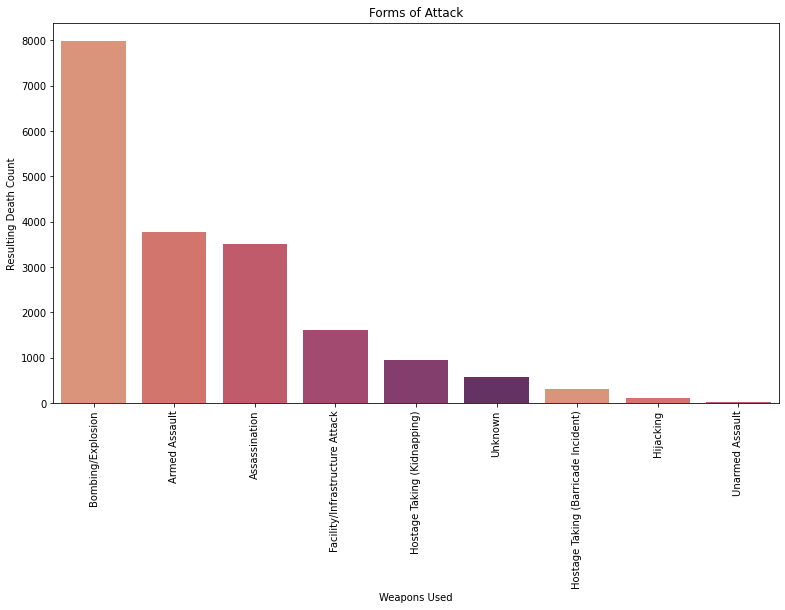

In [ ]:
plt.figure(figsize = (13,7))
sns.countplot(df['attacktype1_txt'], 
              order = df['attacktype1_txt'].value_counts().index,
              palette = sns.color_palette("flare"))
plt.xlabel('Weapons Used')
plt.ylabel('Resulting Death Count')
plt.title('Forms of Attack')
plt.xticks(rotation = 90)
plt.show()

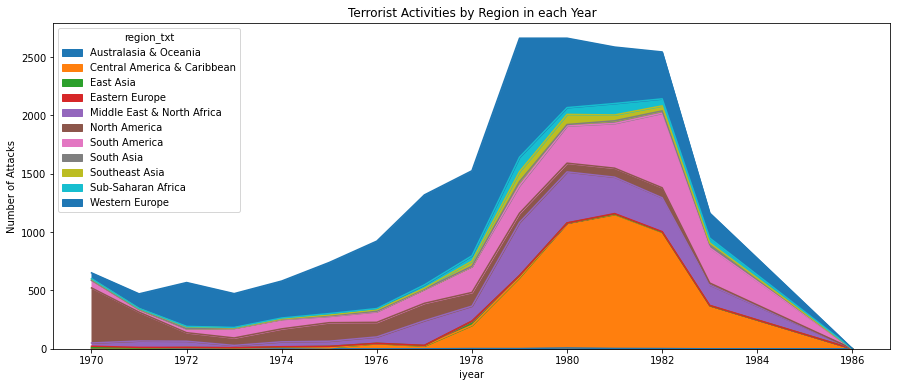

In [ ]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## Interactive Visualizations

In [ ]:
fig = px.bar(df, x='iyear', y='nkill', color='gname',
             labels = {'iyear':'Year', 'nkill':'Number of Deaths','country_txt':'Country', 'nwound':'Wounded', 'gname':'Extremist Group','region_txt':'Region'},
             title = 'Number of Dealths in a Year and the Responsible Extremists',
             hover_data = ['nwound','region_txt'])
fig.show()

In [ ]:
fig = px.choropleth(df, locations='country_txt',locationmode='country names',color='nkill', animation_group='nkill', animation_frame='iyear',
             labels = {'iyear':'Year', 'nkill':'Number of Deaths','country_txt':'Country'},
             title = 'Number of Dealths in a Year in Different Countries')
fig.show()

In [ ]:
pip install plotly==4.5

In [ ]:

fig = px.treemap(df, values='casualities',
                 path=['region_txt','targtype1_txt',],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Treemap Chart: Grouping the Attacked Groups in Different Regions')
fig.show()

In [ ]:
fig = px.treemap(df, values='casualities',
                 path=['region_txt','attacktype1_txt'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Treemap Chart: Grouping the Type of Attacks in Different Regions')
fig.show()

In [ ]:
fig = px.sunburst(df, values='casualities',
                 path=['region_txt','attacktype1_txt'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Sunburst Chart: Grouping the Type of Attacks in Different Regions')
fig.show()

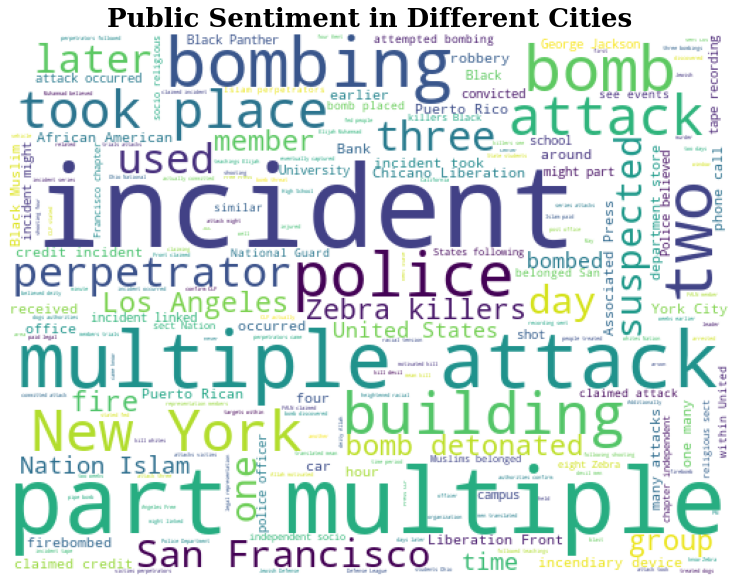

In [ ]:
cities = df.addnotes.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Public Sentiment in Different Cities', 
        fontdict={'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 26,})
plt.show()

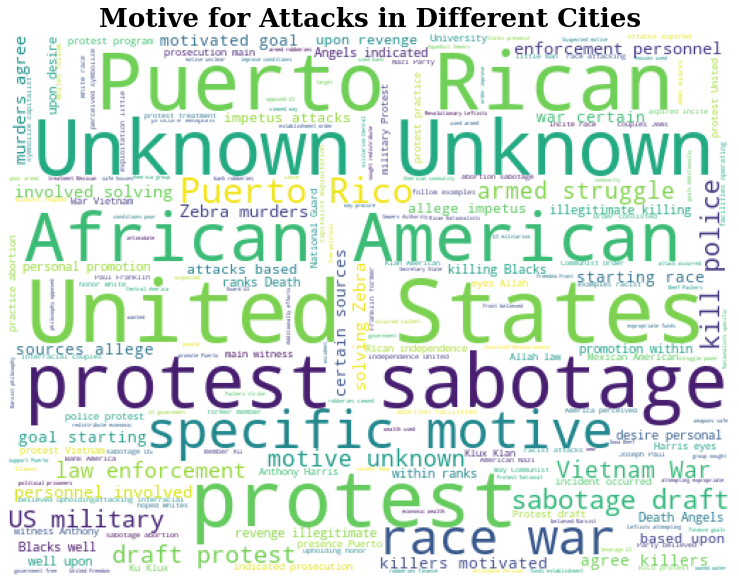

In [ ]:
cities = df.motive.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384,).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Motive for Attacks in Different Cities', 
        fontdict={'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 26,})
plt.show()

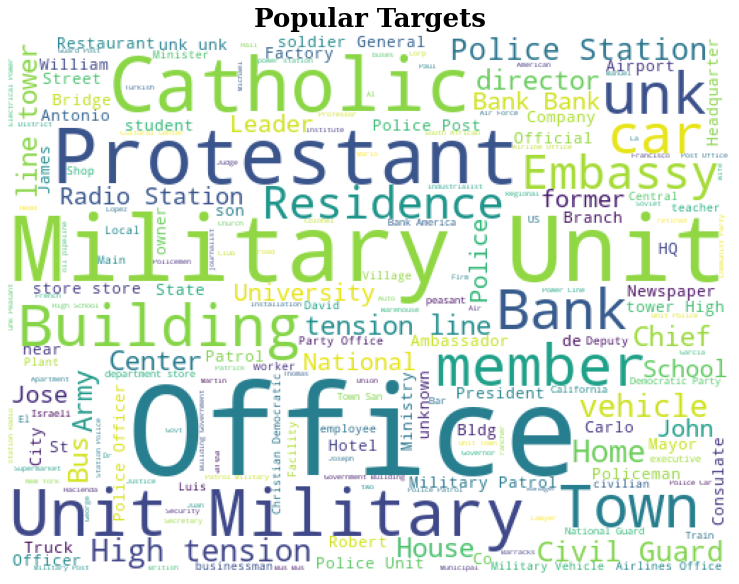

In [ ]:
cities = df.target1.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384,).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Popular Targets', 
        fontdict={'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 26,})
plt.show()